<a href="https://colab.research.google.com/github/Prathambiradr12345/Machine-_learning/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#bias variance trade-off
#3 methods are
#regularization,Bagging,Boasting Ridge
#bias=capture relatioship in  training data
#variance=if error in train data is 10,but error in test data is 100,then variance is 90,variability bahut hai
#overfittting=best working on training data but worst working on test data.
#underfitting=training data mai he relatoiship not find y=mx+b

In [ ]:

#regularization ridge=Add the information in machine learning model reduce the overffitting,
#specially used for regression
# techniques of regularization  1.ridge(l2),2.lasso(l1),elastic net

In [1]:
#!.ridge regularization(l2)=lambda(m*m)m is slope
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
data=load_diabetes()

In [2]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
x=data.data
y=data.target

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [5]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(x_train,y_train)

LinearRegression()

In [6]:
y_pred=l.predict(x_test)

In [7]:
from sklearn.metrics import r2_score,mean_squared_error
print('R2 score',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
#

R2 score 0.5188113124539249
RMSE 48.72713760953253


In [9]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.0001)

In [10]:
r.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [11]:
y_pred=r.predict(x_test)

In [12]:
print('R2 score',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
#

R2 score 0.5189732635884949
RMSE 48.71893700181956


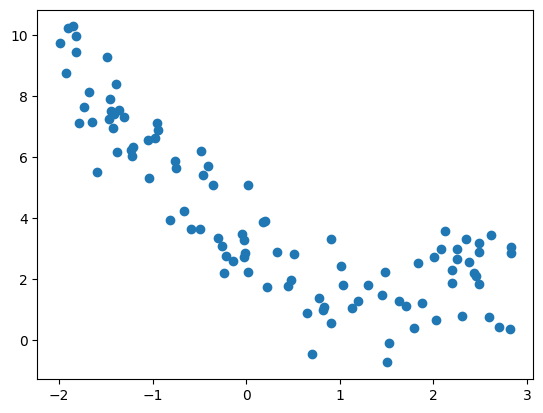

In [13]:
m=100
x1=5*np.random.rand(m,1)-2
x2=0.7*x1**2-2*x1+3+np.random.randn(m,1)
plt.scatter(x1,x2)
plt.show()

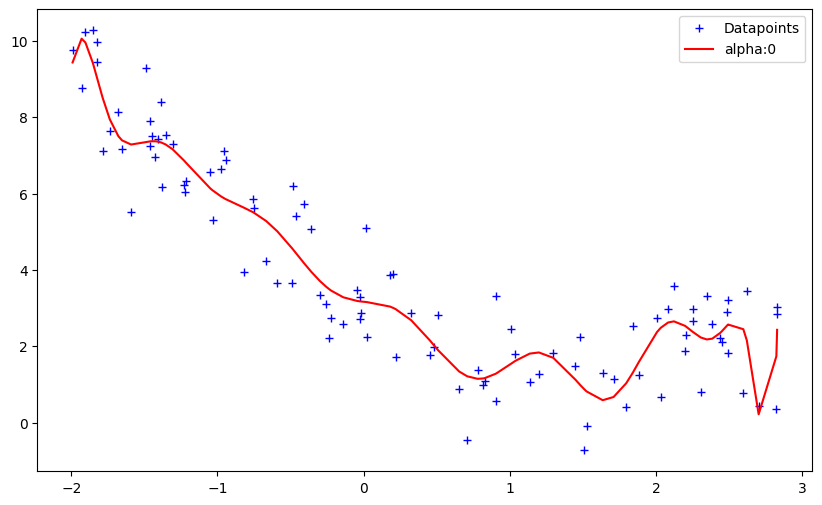

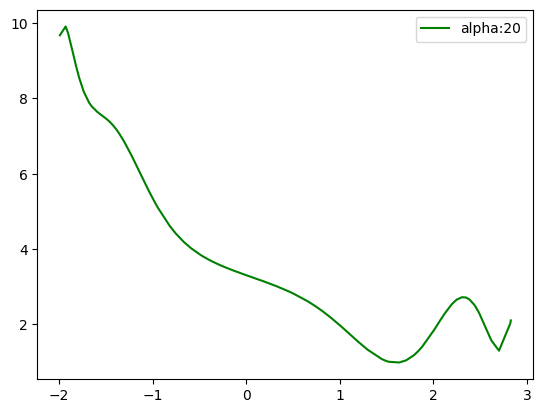

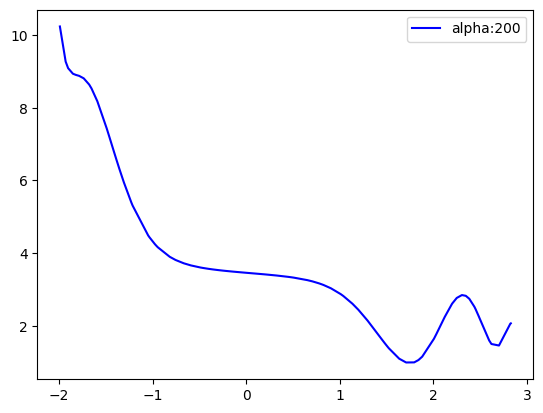

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
def get_preds_ridge(x1,x2,alpha):
  model=Pipeline([
      ('poly',PolynomialFeatures(degree=16)),
      ('ridge',Ridge(alpha=alpha))
  ])
  model.fit(x1,x2)
  return model.predict(x1)
alphas=[0,20,200]
cs=['r','g','b']
plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')
for alpha,c in zip(alphas,cs):
  preds=get_preds_ridge(x1,x2,alpha)
  plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label='alpha:{}'.format(alpha))
  plt.legend()
  plt.show()